In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster

pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_rows = 1000

In [2]:
data = pd.read_csv('sales-data.csv',parse_dates=['barr_date'])
data = data[(data.region_name=="APAC") & (data.business_area_name=="B00 - LTC")]
data.rename(columns={"barr_date":"date","revenue": "sales"}, inplace=True)
display(data.head())

data = data[['date','sales']]
data.reset_index(drop=True, inplace=True)
data.head()

,business_area_name,region_name,date,sales
60,B00 - LTC,APAC,2017-01-01,1246172.06
85,B00 - LTC,APAC,2017-02-01,1730319.36
101,B00 - LTC,APAC,2017-03-01,1992810.58
136,B00 - LTC,APAC,2017-04-01,1421699.13
160,B00 - LTC,APAC,2017-05-01,1735499.02


,date,sales
0,2017-01-01,1246172.06
1,2017-02-01,1730319.36
2,2017-03-01,1992810.58
3,2017-04-01,1421699.13
4,2017-05-01,1735499.02


In [3]:
data.shape

(60, 2)

<AxesSubplot:xlabel='Date', ylabel='Values'>

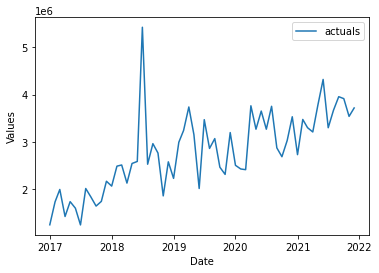

In [4]:
f = Forecaster(y=data['sales'],current_dates=data['date'])
f.plot()

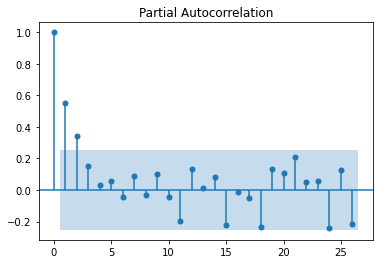

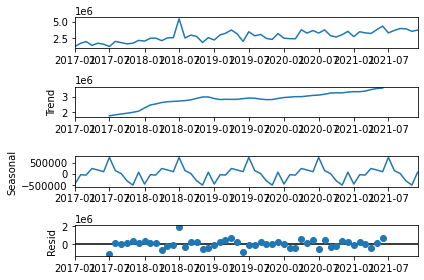

In [5]:
f.plot_pacf(lags=26)
plt.show()

f.seasonal_decompose().plot()
plt.show()

In [6]:
f.set_test_length(12)
f.generate_future_dates(12)
f.set_estimator('lstm')

Epoch 1/50
1/1 [==============================] - 45s 45s/step - loss: 0.4115 - val_loss: 0.3783
Epoch 2/50
1/1 [==============================] - 0s 302ms/step - loss: 0.4023 - val_loss: 0.3625
Epoch 3/50
1/1 [==============================] - 0s 309ms/step - loss: 0.3865 - val_loss: 0.3322
Epoch 4/50
1/1 [==============================] - 0s 283ms/step - loss: 0.3562 - val_loss: 0.2714
Epoch 5/50
1/1 [==============================] - 0s 283ms/step - loss: 0.2954 - val_loss: 0.1804
Epoch 6/50
1/1 [==============================] - 0s 272ms/step - loss: 0.1870 - val_loss: 0.2336
Epoch 7/50
1/1 [==============================] - 0s 256ms/step - loss: 0.2353 - val_loss: 0.1806
Epoch 8/50
1/1 [==============================] - 0s 267ms/step - loss: 0.1822 - val_loss: 0.1354
Epoch 9/50
1/1 [==============================] - 0s 255ms/step - loss: 0.1290 - val_loss: 0.1412
Epoch 10/50
1/1 [==============================] - 0s 266ms/step - loss: 0.1361 - val_loss: 0.1433
Epoch 11/50
1/1 [===

Epoch 34/50
1/1 [==============================] - 0s 332ms/step - loss: 0.0956 - val_loss: 0.1496
Epoch 35/50
1/1 [==============================] - 0s 323ms/step - loss: 0.0943 - val_loss: 0.1443
Epoch 36/50
1/1 [==============================] - 0s 324ms/step - loss: 0.0934 - val_loss: 0.1398
Epoch 37/50
1/1 [==============================] - 0s 323ms/step - loss: 0.0937 - val_loss: 0.1388
Epoch 38/50
1/1 [==============================] - 0s 331ms/step - loss: 0.0940 - val_loss: 0.1403
Epoch 39/50
1/1 [==============================] - 0s 322ms/step - loss: 0.0940 - val_loss: 0.1439
Epoch 40/50
1/1 [==============================] - 0s 322ms/step - loss: 0.0938 - val_loss: 0.1476
Epoch 41/50
1/1 [==============================] - 0s 336ms/step - loss: 0.0942 - val_loss: 0.1481
Epoch 42/50
1/1 [==============================] - 0s 322ms/step - loss: 0.0944 - val_loss: 0.1452
Epoch 43/50
1/1 [==============================] - 0s 333ms/step - loss: 0.0941 - val_loss: 0.1409
Epoch 44/5

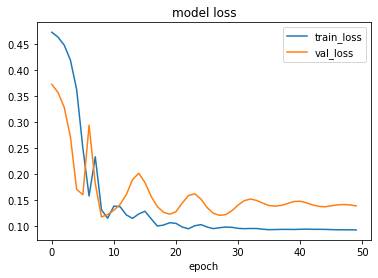

In [7]:
f.manual_forecast(call_me='lstm',
                  lags=24,
                  batch_size=24,
                  epochs=50,
                  validation_split=.20,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  learning_rate=0.001,
                  lstm_layer_sizes=(100,)*15,
                  dropout=(0,)*15,
                  plot_loss=True)

<AxesSubplot:xlabel='Date', ylabel='Values'>

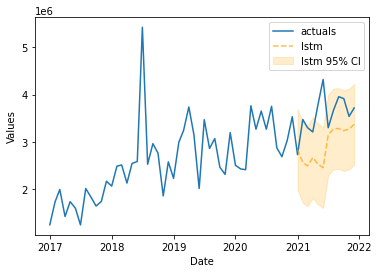

In [8]:
f.plot_test_set(ci=True)

<AxesSubplot:xlabel='Date', ylabel='Values'>

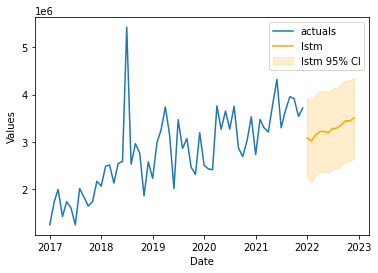

In [9]:
f.generate_future_dates(12)
f.add_time_trend()
f.export(to_excel=True,excel_name='results.xlsx')
f.plot(ci=True)

In [10]:
f.export('model_summaries',determine_best_by='LevelTestSetMAPE')[
    ['ModelNickname',
     'LevelTestSetMAPE',
     'LevelTestSetRMSE',
     'LevelTestSetR2',
     'best_model']
]

,ModelNickname,LevelTestSetMAPE,LevelTestSetRMSE,LevelTestSetR2,best_model
0,lstm,0.18,821050.19,-3.27,True


In [11]:
test_2021 = f.export_test_set_preds_with_cis('lstm')
display(test_2021.head(12))

predicted_2022 = f.export_forecasts_with_cis('lstm')
display(predicted_2022.head(12))

,DATE,UpperPreds,Preds,Actuals,LowerPreds,ModelNickname,CILevel
0,2021-01-01,3691045.32,2839255.45,2728857.38,1987465.57,lstm,0.95
1,2021-02-01,3416405.58,2564615.70,3472580.29,1712825.83,lstm,0.95
2,2021-03-01,3342532.32,2490742.45,3298921.54,1638952.57,lstm,0.95
3,2021-04-01,3517118.22,2665328.34,3208026.34,1813538.46,lstm,0.95
4,2021-05-01,3382777.39,2530987.51,3775221.00,1679197.63,lstm,0.95
5,2021-06-01,3304899.99,2453110.12,4318325.87,1601320.24,lstm,0.95
6,2021-07-01,4001211.68,3149421.80,3297676.33,2297631.92,lstm,0.95
7,2021-08-01,4125364.30,3273574.43,3666294.02,2421784.55,lstm,0.95
8,2021-09-01,4132946.87,3281157.00,3953804.19,2429367.12,lstm,0.95
9,2021-10-01,4087683.41,3235893.54,3912485.79,2384103.66,lstm,0.95


,DATE,UpperForecast,Forecast,LowerForecast,ModelNickname,CILevel
0,2022-01-01,3932512.95,3080723.08,2228933.20,lstm,0.95
1,2022-02-01,3867041.42,3015251.55,2163461.67,lstm,0.95
2,2022-03-01,3991357.41,3139567.53,2287777.66,lstm,0.95
3,2022-04-01,4067243.75,3215453.88,2363664.00,lstm,0.95
4,2022-05-01,4072906.00,3221116.12,2369326.24,lstm,0.95
5,2022-06-01,4044255.74,3192465.86,2340675.98,lstm,0.95
6,2022-07-01,4131773.49,3279983.61,2428193.73,lstm,0.95
7,2022-08-01,4140435.69,3288645.81,2436855.94,lstm,0.95
8,2022-09-01,4210435.54,3358645.67,2506855.79,lstm,0.95
9,2022-10-01,4294742.91,3442953.04,2591163.16,lstm,0.95


In [12]:
Total_2021 = test_2021['Actuals'].sum()
Total_2022 = predicted_2022['Forecast'].sum()

Yoy_growth = (Total_2022 - Total_2021)/ Total_2021 * 100

print(f'Total_2021:{Total_2021}')
print(f'Total_2022:{Total_2022}')
print(f'YOY (growth):{Yoy_growth}')

Total_2021:42885095.630139
Total_2022:39181767.98078899
YOY (growth):-8.635465526972888
